### Thanirin Trironnarith
#### 6088122 (sec1)

In [17]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [18]:
im = cv2.imread('picture.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

(1032, 800, 3)


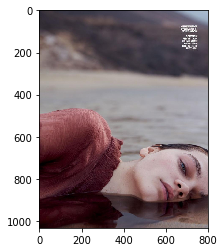

In [19]:
plt.imshow(im)
print(im.shape)

In [20]:
def get_figsize(img):
    # pixel -> inches
    dpi = plt.rcParams['figure.dpi']
    dim = img.shape
    figuresize = dim[1] / float(dpi), dim[0] / float(dpi)
    return figuresize

In [21]:
def display_image_actual_size(img):
    figuresize = get_figsize(img)
    fig = plt.figure(figsize=figuresize)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.imshow(img, cmap='gray')
    ax.axis('off')
    plt.show()

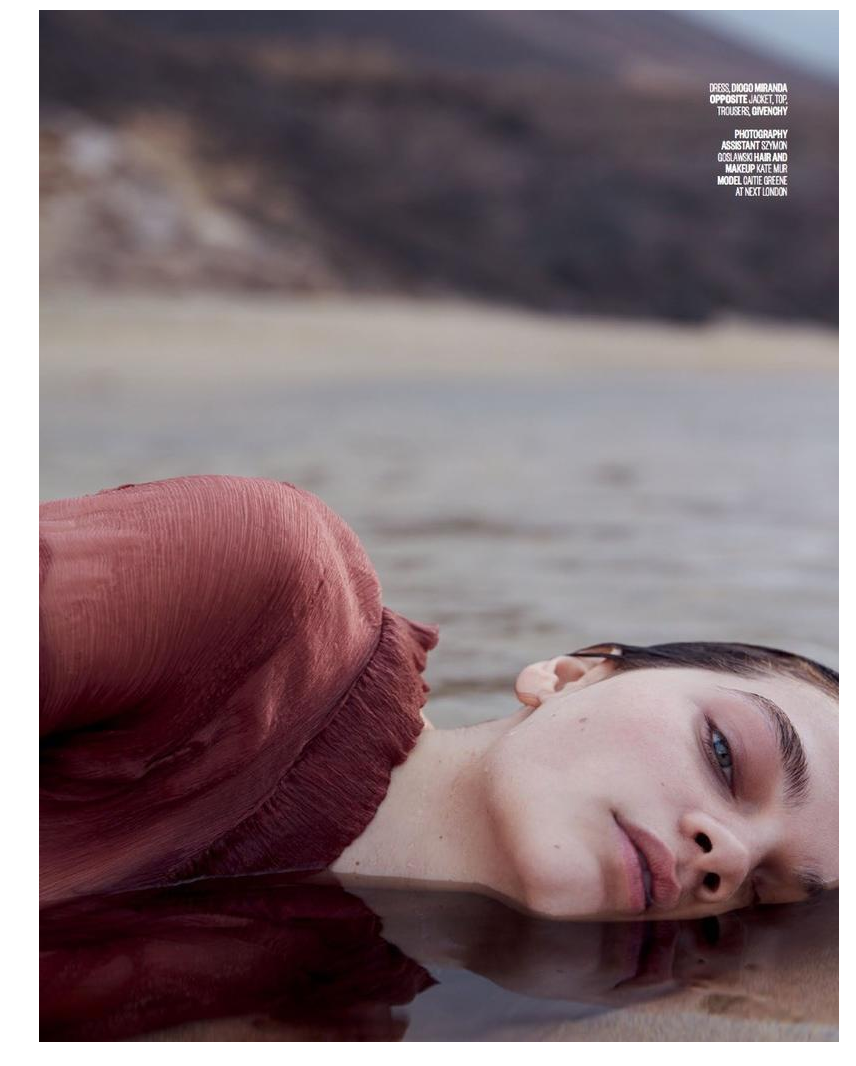

In [22]:
display_image_actual_size(im)

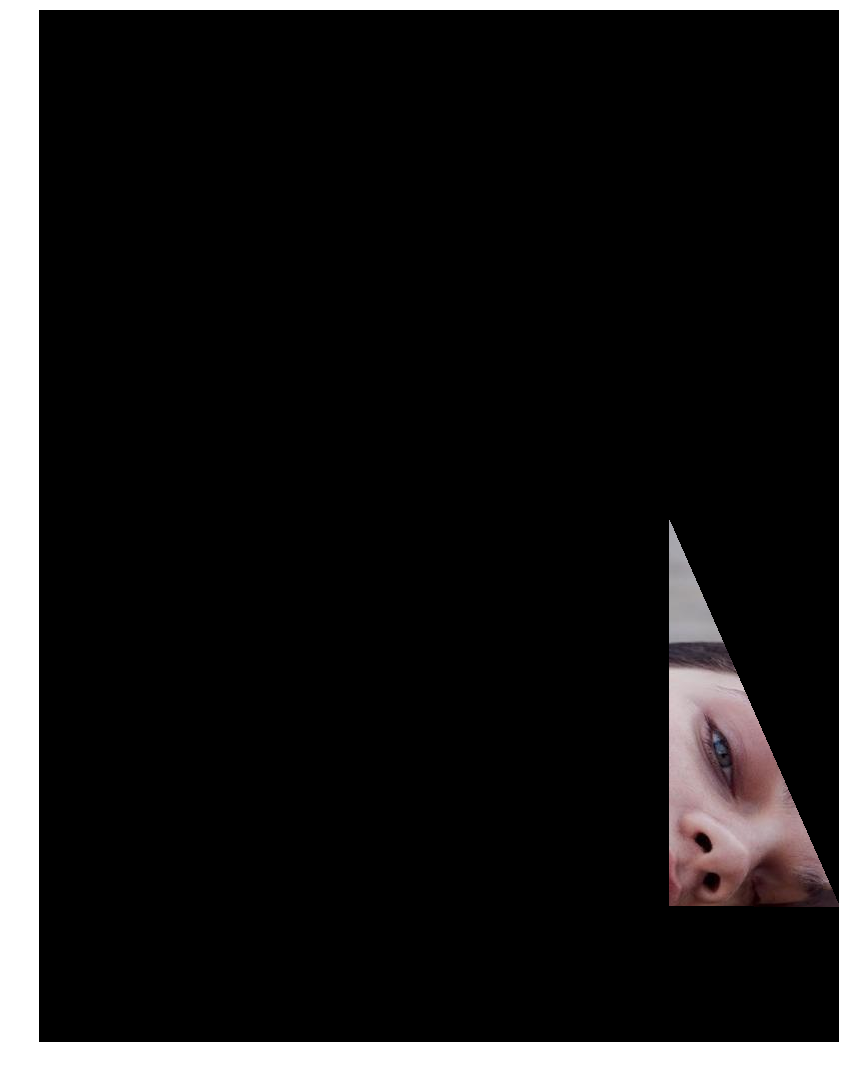

In [52]:
# original
roi_or = im.copy()
mask = np.zeros(roi_or.shape, dtype=np.uint8)
coor = np.array([[630,510], [630,895], [800,896]], dtype=np.int32)
channel_count = roi_or.shape[2]
ignore_mask_color = (255,)*channel_count
cv2.fillConvexPoly(mask, coor, ignore_mask_color)

original = cv2.bitwise_and(roi_or, mask)
# plt.show(masked_image)
display_image_actual_size(original)

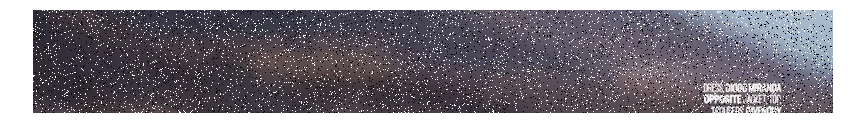

In [24]:
#salt and pepper
def saltpepper_noise(image, prob):
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = np.random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

roi_sp = im[0:103,:,:]
saltpep = saltpepper_noise(roi_sp, 0.05)
display_image_actual_size(saltpep)

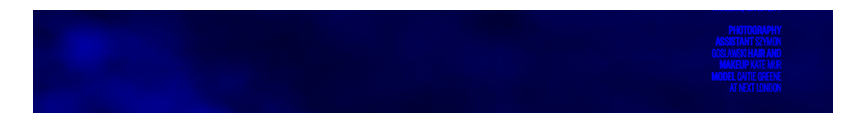

In [25]:
# blue channel
bluecol = im[104:207,:,:]
bluecol[:,:,0] = 0
bluecol[:,:,1] = 0
display_image_actual_size(bluecol)

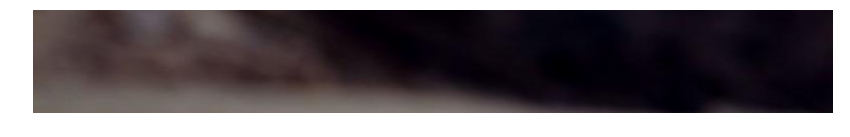

In [26]:
# darker image
darker = im[208:311,:,:]
weight = 50
for i in range(3):
    darker[:,:,i] = cv2.subtract(darker[:,:,i], weight)
display_image_actual_size(darker)

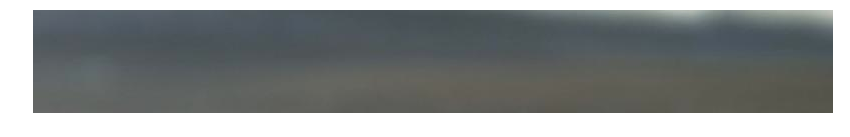

In [27]:
# negative
negative = im[312:415,:,:]
for i in range(3):
    negative[:,:,i] = 255 - negative[:,:,i]
display_image_actual_size(negative)

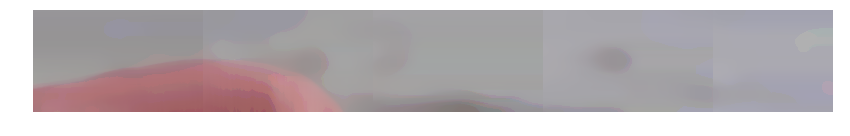

In [28]:
# median filter
med = im[416:518,:,:]
med = cv2.medianBlur(med, 21)
display_image_actual_size(med)

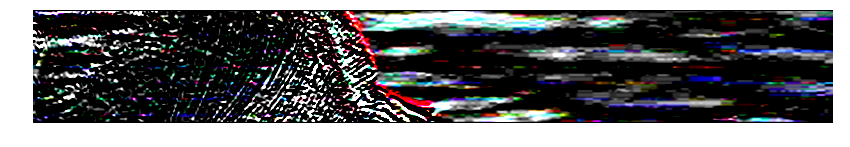

In [37]:
# sobel edge horizontal
sobel = im[519:632,:]
sobel = cv2.Sobel(sobel, -1, 0, 1, ksize=5)
display_image_actual_size(sobel)

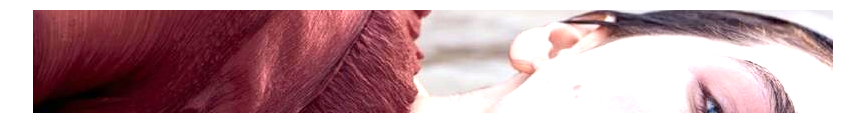

In [30]:
# higher contrast
contra = im[633:736,:,:]
for i in range(3):
    contra[:,:,i] = cv2.multiply(contra[:,:,i],1.5)
display_image_actual_size(contra)

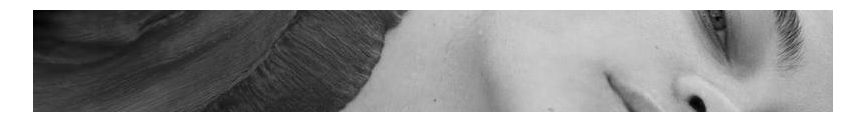

In [31]:
# red in gray
red_in_gray = im[737:839,:,0]
red_in_gray = cv2.cvtColor(red_in_gray, cv2.COLOR_GRAY2RGB)
display_image_actual_size(red_in_gray)

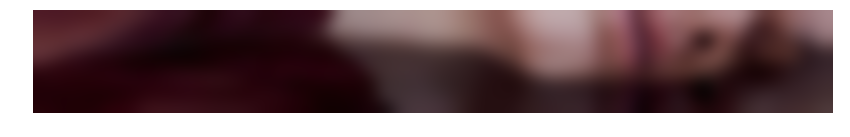

In [32]:
# gaussian blur
gauss = im[840:943,:,:]
gauss = cv2.GaussianBlur(gauss, (51,51), 0)
display_image_actual_size(gauss)

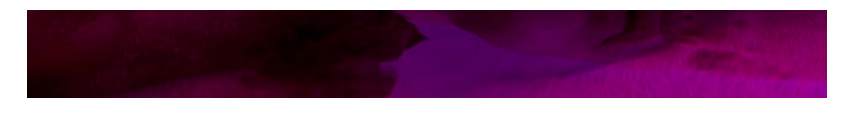

In [33]:
# red-blue
redblue = im[944:1032,:,:]
redblue[:,:,1] = 0
display_image_actual_size(redblue)

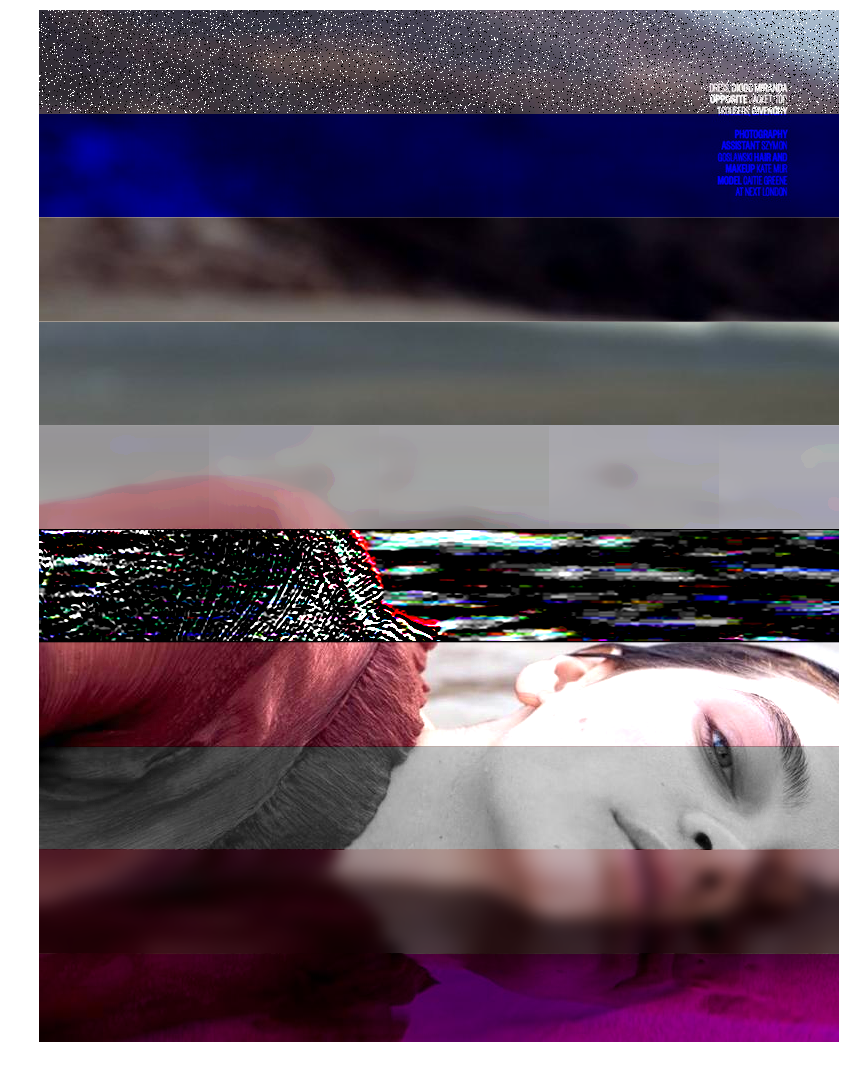

In [38]:
im[0:103,:,:] = saltpep
im[104:207,:,:] = bluecol
im[208:311,:,:] = darker
im[312:415,:,:] = negative
im[416:518,:,:] = med
im[519:632,:,:] = sobel
im[633:736,:,:] = contra
im[737:839,:,:] = red_in_gray
im[840:943,:,:] = gauss
im[944:1032,:,:] = redblue
display_image_actual_size(im)

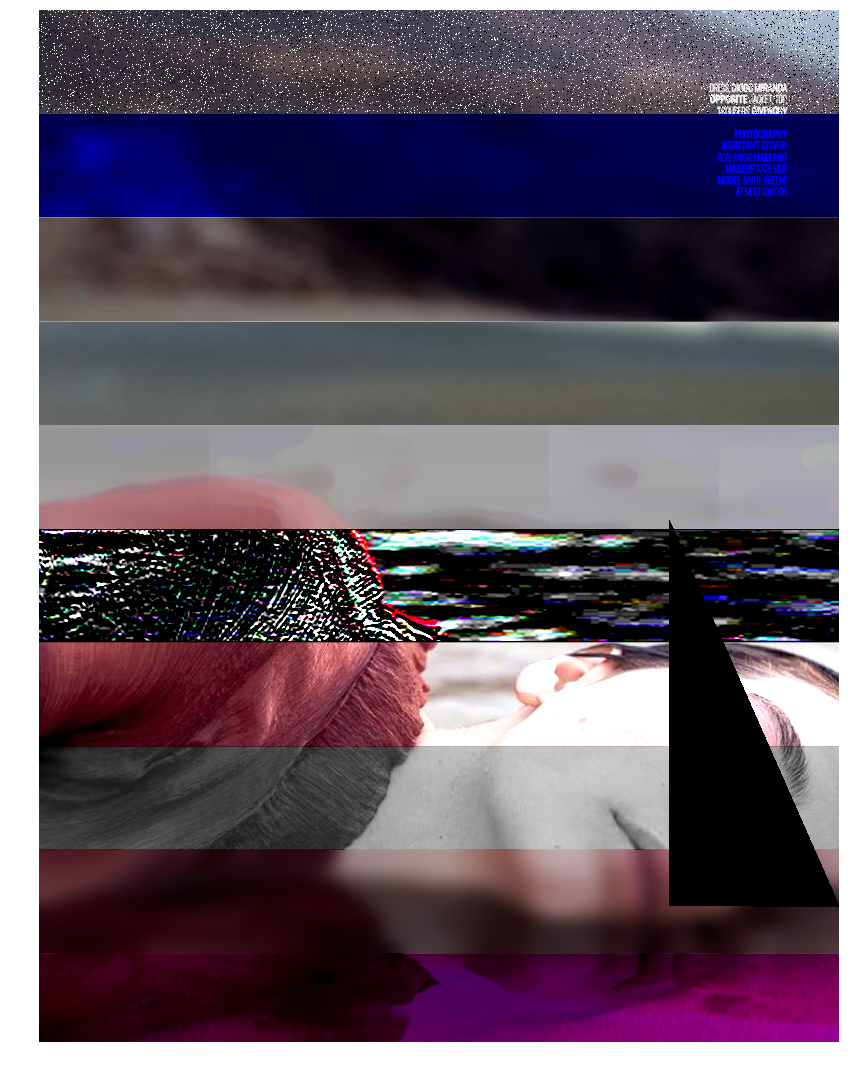

In [39]:
roi_or = im.copy()
mask = np.zeros(roi_or.shape, dtype=np.uint8)
coor = np.array([[630,510], [630,895], [800,896]], dtype=np.int32)
channel_count = roi_or.shape[2]
ignore_mask_color = (255,)*channel_count
cv2.fillConvexPoly(mask, coor, ignore_mask_color)
mask = cv2.bitwise_not(mask)
# display_image_actual_size(mask)
masked_image = cv2.bitwise_and(roi_or, mask)
# plt.show(masked_image)
display_image_actual_size(masked_image)

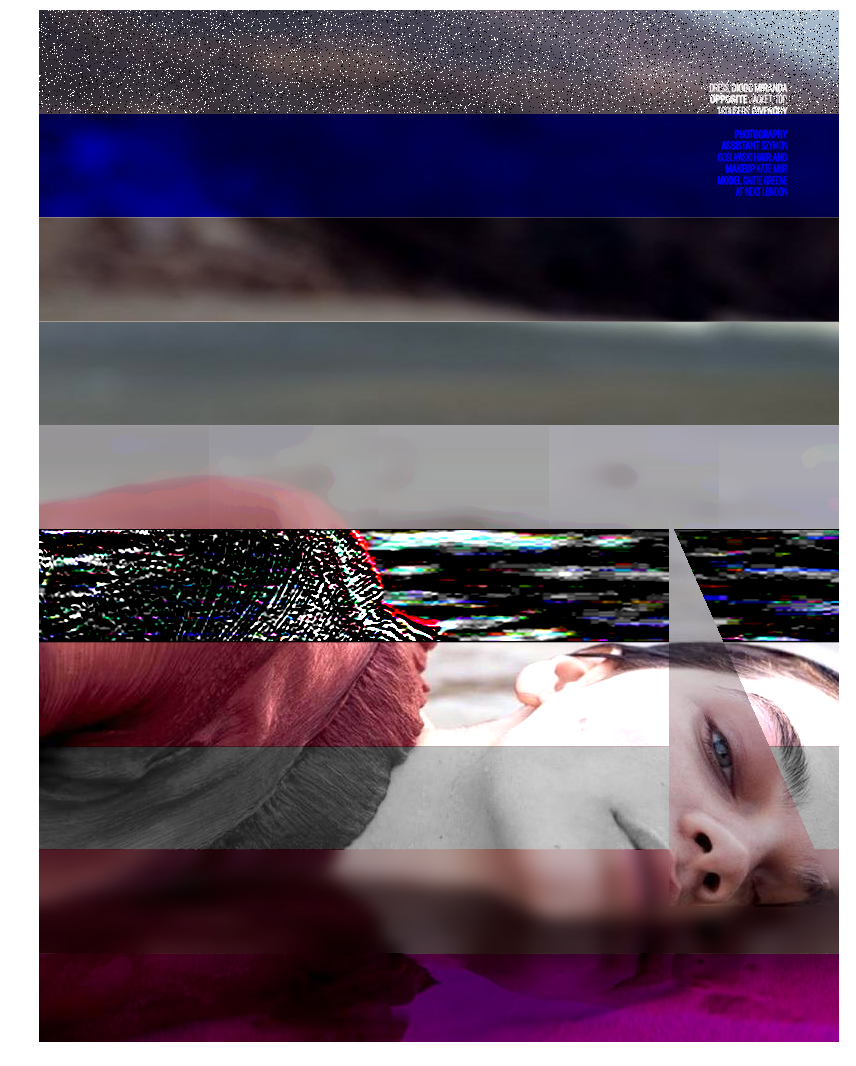

True

In [43]:
im = cv2.bitwise_or(masked_image, original)
display_image_actual_size(im)
cv2.imwrite('picture_transformed.jpg', cv2.cvtColor(im, cv2.COLOR_BGR2RGB))

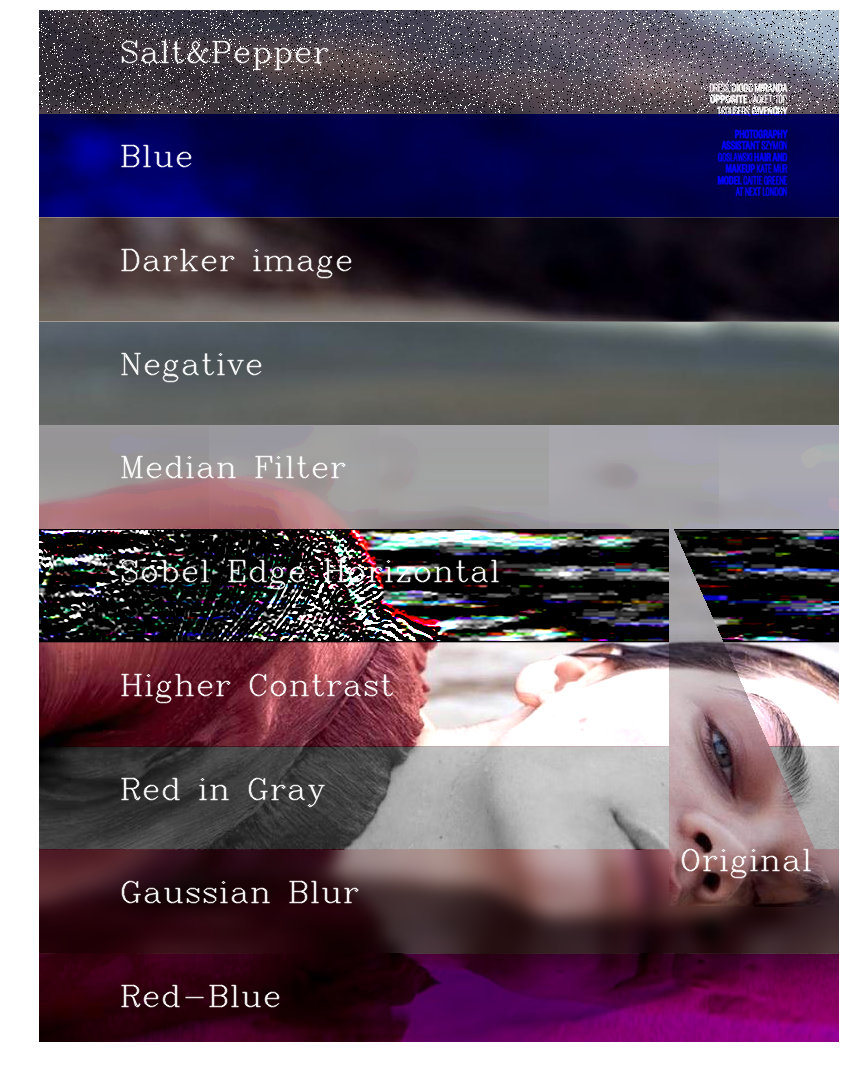

True

In [46]:
im_text = im.copy()
cv2.putText(im_text, "Salt&Pepper", (80,52), cv2.FONT_HERSHEY_COMPLEX, 1.0, (255, 255, 255), 1, lineType=cv2.LINE_AA)
cv2.putText(im_text, "Blue", (80,156), cv2.FONT_HERSHEY_COMPLEX, 1.0, (255, 255, 255), 1, lineType=cv2.LINE_AA)
cv2.putText(im_text, "Darker image", (80,260), cv2.FONT_HERSHEY_COMPLEX, 1.0, (255, 255, 255), 1, lineType=cv2.LINE_AA)
cv2.putText(im_text, "Negative", (80,364), cv2.FONT_HERSHEY_COMPLEX, 1.0, (255, 255, 255), 1, lineType=cv2.LINE_AA)
cv2.putText(im_text, "Median Filter", (80,467), cv2.FONT_HERSHEY_COMPLEX, 1.0, (255, 255, 255), 1, lineType=cv2.LINE_AA)
cv2.putText(im_text, "Sobel Edge Horizontal", (80,571), cv2.FONT_HERSHEY_COMPLEX, 1.0, (255, 255, 255), 1, lineType=cv2.LINE_AA)
cv2.putText(im_text, "Higher Contrast", (80,685), cv2.FONT_HERSHEY_COMPLEX, 1.0, (255, 255, 255), 1, lineType=cv2.LINE_AA)
cv2.putText(im_text, "Red in Gray", (80,789), cv2.FONT_HERSHEY_COMPLEX, 1.0, (255, 255, 255), 1, lineType=cv2.LINE_AA)
cv2.putText(im_text, "Gaussian Blur", (80,892), cv2.FONT_HERSHEY_COMPLEX, 1.0, (255, 255, 255), 1, lineType=cv2.LINE_AA)
cv2.putText(im_text, "Red-Blue", (80,996), cv2.FONT_HERSHEY_COMPLEX, 1.0, (255, 255, 255), 1, lineType=cv2.LINE_AA)
cv2.putText(im_text, "Original", (640,860), cv2.FONT_HERSHEY_COMPLEX, 1.0, (255, 255, 255), 1, lineType=cv2.LINE_AA)
display_image_actual_size(im_text)
cv2.imwrite('picture_transformed_text.jpg', cv2.cvtColor(im_text, cv2.COLOR_BGR2RGB))

special thanks to:  

   * [How to draw a polygon](https://stackoverflow.com/questions/15341538/numpy-opencv-2-how-do-i-crop-non-rectangular-region#fromHistory)  
    
   * [More about fillConvexPoly](https://stackoverflow.com/questions/11270250/what-does-the-python-interface-to-opencv2-fillpoly-want-as-input#fromHistory)  
    
   * [And fonts for cv2](https://codeyarns.com/2015/03/11/fonts-in-opencv/)  

   * My lovely friends